In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings('ignore')


In [2]:
# List the contents of the '../input' directory using shell command
!ls ../input/digit-recognizer/


sample_submission.csv  test.csv  train.csv


In [3]:
data = pd.read_csv('../input/digit-recognizer/train.csv')
print (data.shape)
data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('../input/digit-recognizer/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Define the first column as the result that we must get
Y_train = data["label"]
# Drop label column
X_train = data.drop(labels = ["label"],axis = 1)
Y_train = pd.Series(Y_train, dtype="category")

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

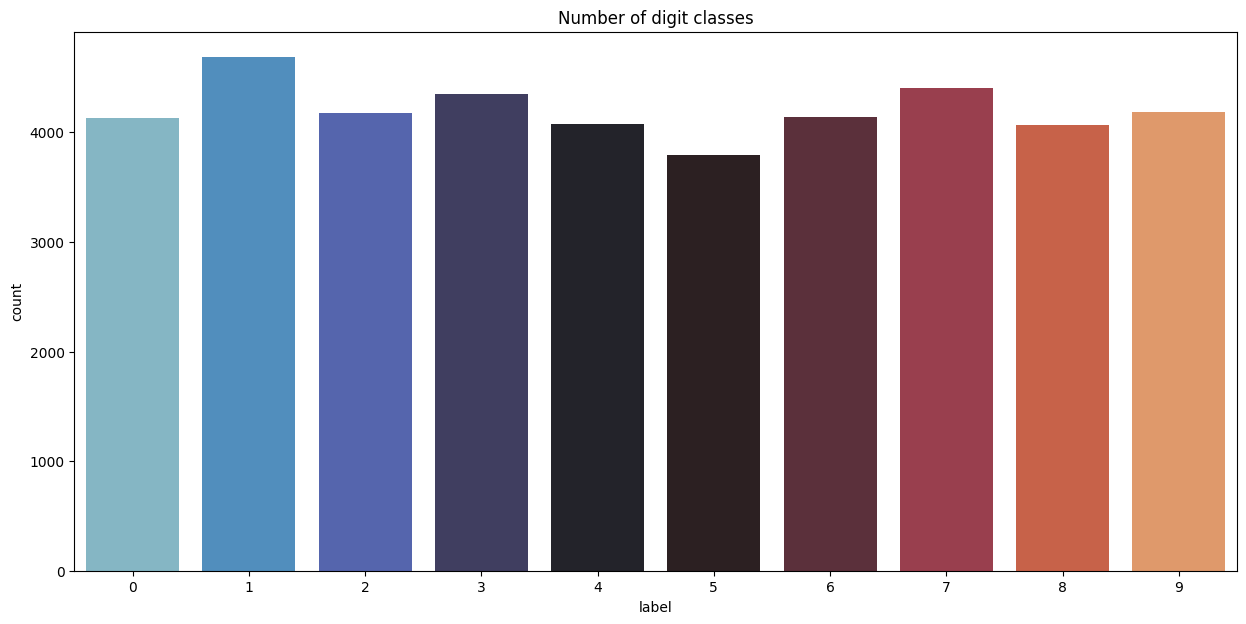

In [6]:
# Visualize the number of digits classes
plt.figure(figsize = (15,7))
g = sns.countplot(x = Y_train, palette = 'icefire')
plt.title("Number of digit classes")
Y_train.value_counts()

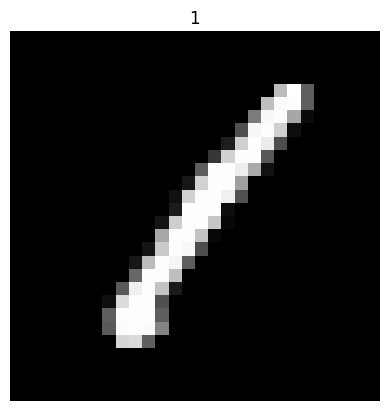

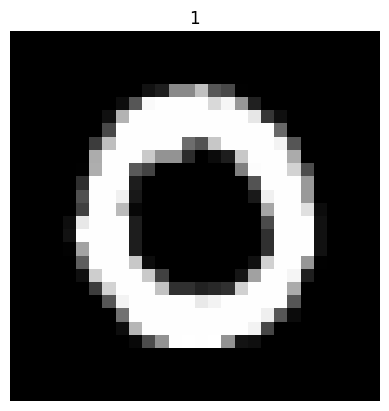

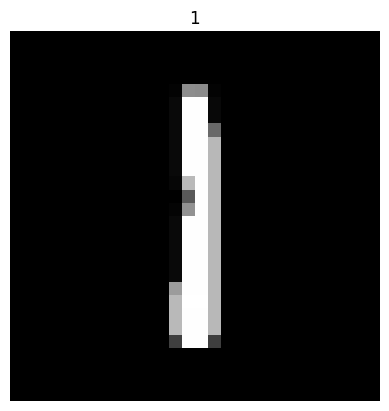

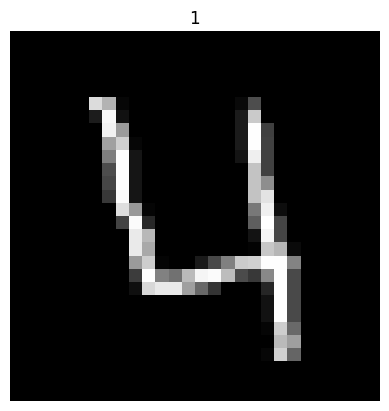

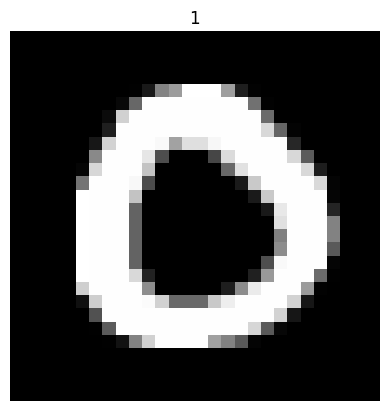

In [7]:
for i in range(5):
    img = X_train.iloc[i].values
    img = img.reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.title(data.iloc[0,0])
    plt.axis('off')
    plt.show()

In [8]:
# Normalize the data

X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ", X_train.shape)
print("test shape: ", test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ", X_train.shape)
print("test shape: ", test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [10]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800,)
y_test shape (4200,)


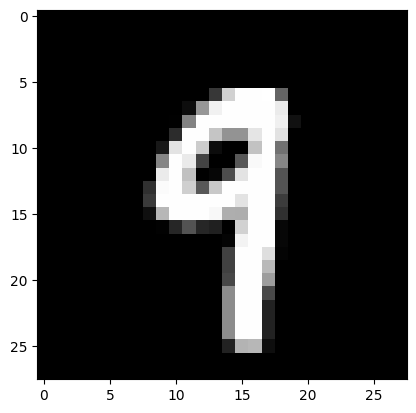

In [11]:
plt.imshow(X_train[2][:,:,0],cmap = 'gray')
plt.show()

In [12]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

2024-08-01 07:51:52.533128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 07:51:52.533276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 07:51:52.715657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [14]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the data to include the channel dimension (since MNIST is grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Split training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

# Check the shapes of the data and labels
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"Y_val shape: {Y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

# Create an instance of ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the generator to the data
datagen.fit(X_train)

# Define the Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Set training parameters
batch_size = 32
epochs = 10

# Fit the model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_val, Y_val), 
                    steps_per_epoch=X_train.shape[0] // batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_accuracy}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (54000, 28, 28, 1)
Y_train shape: (54000, 10)
X_val shape: (6000, 28, 28, 1)
Y_val shape: (6000, 10)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.7690 - loss: 0.7085 - val_accuracy: 0.9838 - val_loss: 0.0567
Epoch 2/10
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 1.0000 - loss: 0.0543 - val_accuracy: 0.9838 - val_loss: 0.0561
Epoch 3/10
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9485 - loss: 0.1729 - val_accuracy: 0.9855 - val_loss: 0.0438
Epoch 4/10
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 1.0000 - loss: 0.0279 - val_accuracy: 0.9855 - val_loss: 0.0434
Epoch 5/10
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9607 - loss: 0.1343 - val_accuracy: 0.9890 - val_loss: 0.0405
Epoch 6/10
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9688 - loss: 0.0913 - val_accuracy: 0.9890 - val_loss: 0.0390
Epoch 7/10
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9697 - loss: 0.1006 - val_accuracy: 0.9870 - val_loss: 0.0406
Epoch 8/10
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.9688 -

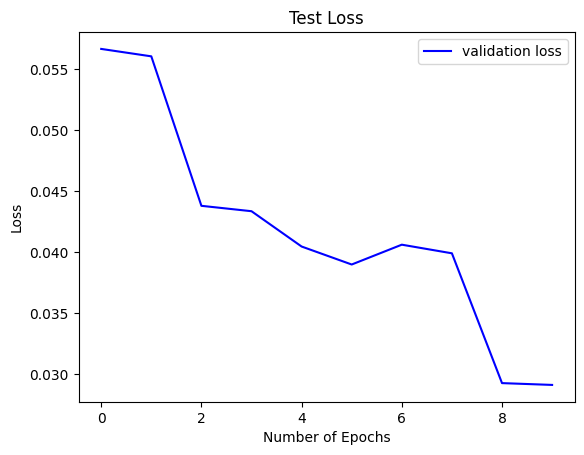

In [18]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


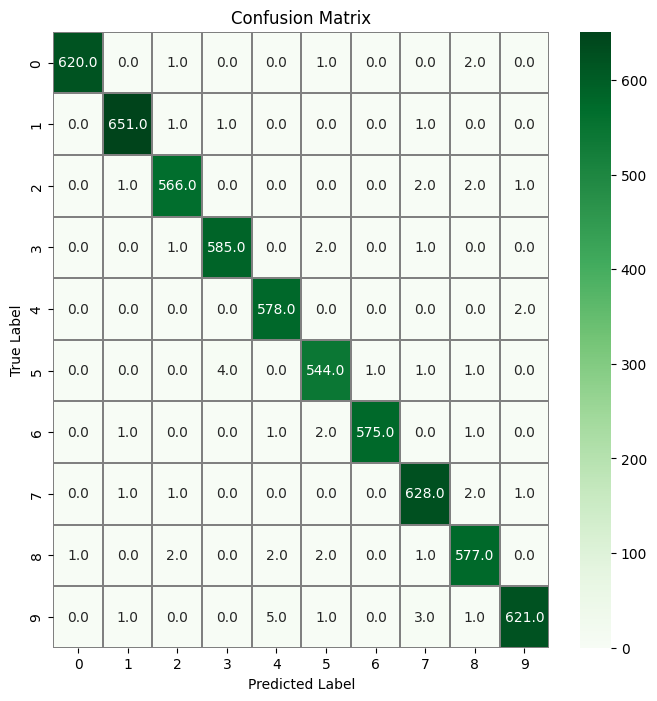

In [19]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


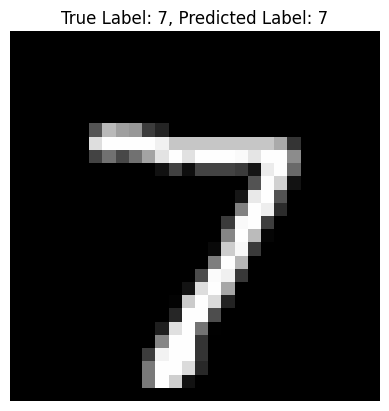

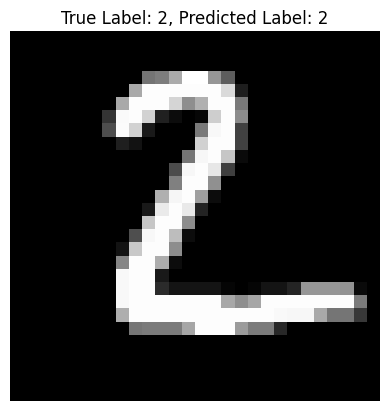

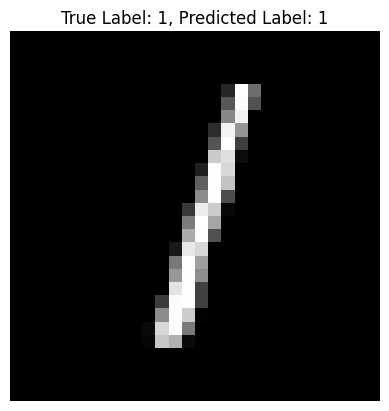

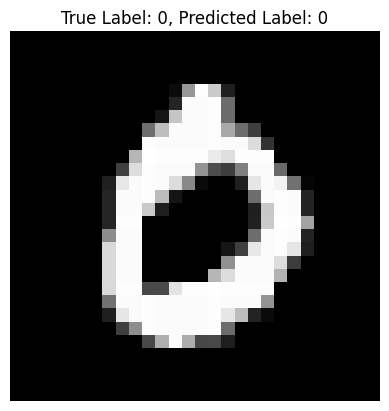

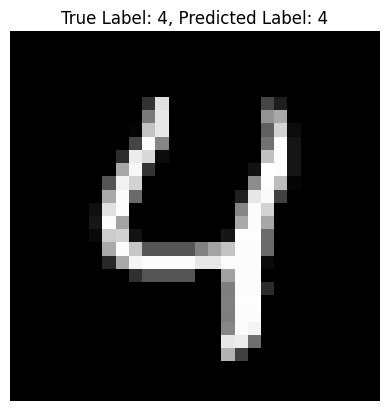

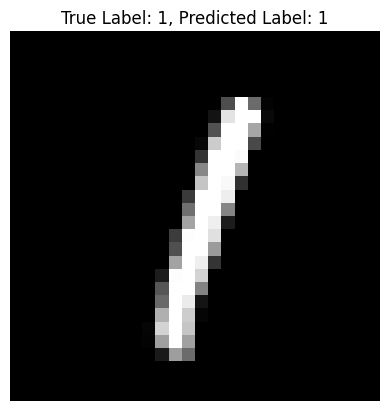

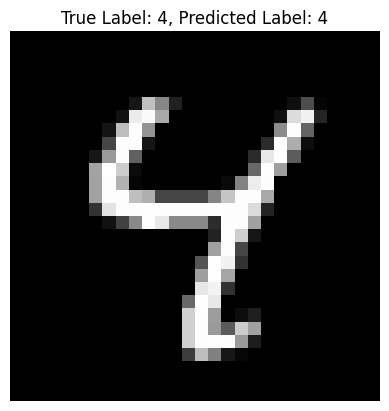

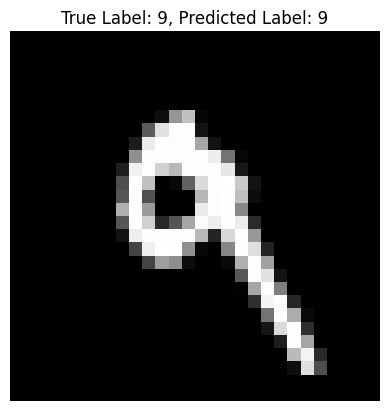

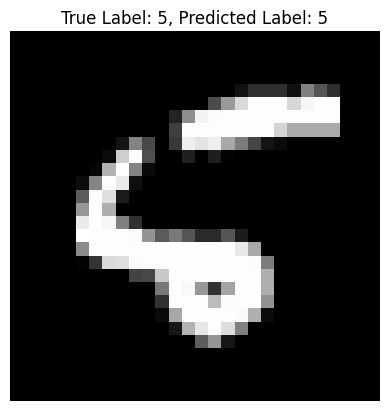

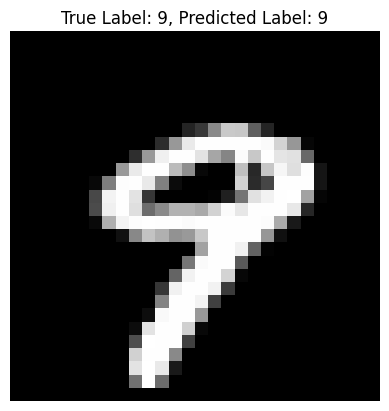

Test accuracy: 99.15%


In [20]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to class labels
true_labels = np.argmax(Y_test, axis=1)

# Check some predictions
def check_predictions(X, y_true, y_pred, index):
    """
    Function to plot the image and display the true and predicted label.
    """
    plt.imshow(X[index].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {y_true[index]}, Predicted Label: {y_pred[index]}")
    plt.axis('off')
    plt.show()

# Example: Check predictions for the first 5 test images
for i in range(10):
    check_predictions(X_test, true_labels, predicted_labels, i)

# Calculate accuracy
accuracy = np.sum(predicted_labels == true_labels) / len(true_labels)
print(f"Test accuracy: {accuracy * 100:.2f}%")